# Optimal U-Net for Image Segmentation

## Experiments

In this notebook, we perform 4 experiments to analyze the effects of U-Net architecture parameters on their image segmentation performance. 


In [1]:
import sys
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2

from keras.models import load_model
from deepiction_unet import Unet_multiclass
from deepiction_data import Dataset_image_label
from deepiction_prediction import Prediction
from deepiction_tools import Colors, report_resources

from unet_experiment import *

2022-12-21 13:31:24.923837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 13:31:25.040057: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### 1. U-Net Image segmentation 

We first show how we can train a single U-Net with a fixed architecture on a dataset of generated images. 

#### 1.1. Loading generated dataset

We start by loading an example dataset and displaying its parameters. 

In [2]:
avg_radius = 30
sigma_back = 5.0
data_train, data_test, dataset_params, nk = load_dataset(avg_radius, sigma_back, verbose=True)

Dataset parameters:


,density,avg_radius,diff_mean,sigma_cell,sigma_back,magnitude,no_overlap,num_images,num_cells,similarity
0,0.4,30.0,0.0,1.0,5.0,20.0,True,100,38,0.2


 Loading training set...


,Filename,Shape Image,Type Image,Min/Max Image,Shape Label,Type Label,Min/Max Label
0,001.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
1,002.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
2,003.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
3,004.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
4,005.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
...,...,...,...,...,...,...,...
95,096.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
96,097.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
97,098.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
98,099.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1



/home/jovyan/work/ml-project-2-stateoftheart/data_synthesis/generated_datasets/dataset_rad30.0_sig5.0/train
Images:  (100, 512, 512, 1)  min: 0.0  max: 1.0
Labels:  (100, 512, 512, 1)  min: 0  max: 1
Classes: 2 [0 1]
 Loading test set...


,Filename,Shape Image,Type Image,Min/Max Image,Shape Label,Type Label,Min/Max Label
0,001.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
1,002.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
2,003.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
3,004.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
4,005.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
...,...,...,...,...,...,...,...
95,096.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
96,097.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
97,098.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1
98,099.tif,"(512, 512)",uint8,0...255,"(512, 512)",uint8,0...1



/home/jovyan/work/ml-project-2-stateoftheart/data_synthesis/generated_datasets/dataset_rad30.0_sig5.0/test
Images:  (100, 512, 512, 1)  min: 0.0  max: 1.0
Labels:  (100, 512, 512, 1)  min: 0  max: 1
Classes: 2 [0 1]


#### 1.2. U-Net training

Model 'rad30_sig5.0_ch8_pools3_max_stride2_skip1-1-1_15E' already trained, overwriting previous training...


2022-12-21 13:31:30.573476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 13:31:31.190494: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30972 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:af:00.0, compute capability: 7.0


Epoch 1/15


2022-12-21 13:31:34.758170: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-12-21 13:31:35.400316: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 13:31:35.401439: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 13:31:35.401458: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-21 13:31:35.402483: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-21 13:31:35.402534: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


10/10 [==============================] - ETA: 0s - loss: 0.6785
Epoch 1: val_loss improved from inf to 0.66913, saving model to /home/jovyan/work/ml-project-2-stateoftheart/results/rad30_sig5.0_ch8_pools3_max_stride2_skip1-1-1_15E/model_best.hdf5
10/10 [==============================] - 9s 320ms/step - loss: 0.6785 - val_loss: 0.6691
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 0.6477
Epoch 2: val_loss improved from 0.66913 to 0.55387, saving model to /home/jovyan/work/ml-project-2-stateoftheart/results/rad30_sig5.0_ch8_pools3_max_stride2_skip1-1-1_15E/model_best.hdf5
10/10 [==============================] - 1s 68ms/step - loss: 0.6477 - val_loss: 0.5539
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss: 0.5013
Epoch 3: val_loss improved from 0.55387 to 0.36028, saving model to /home/jovyan/work/ml-project-2-stateoftheart/results/rad30_sig5.0_ch8_pools3_max_stride2_skip1-1-1_15E/model_best.hdf5
10/10 [==============================] - 1s 67ms/ste

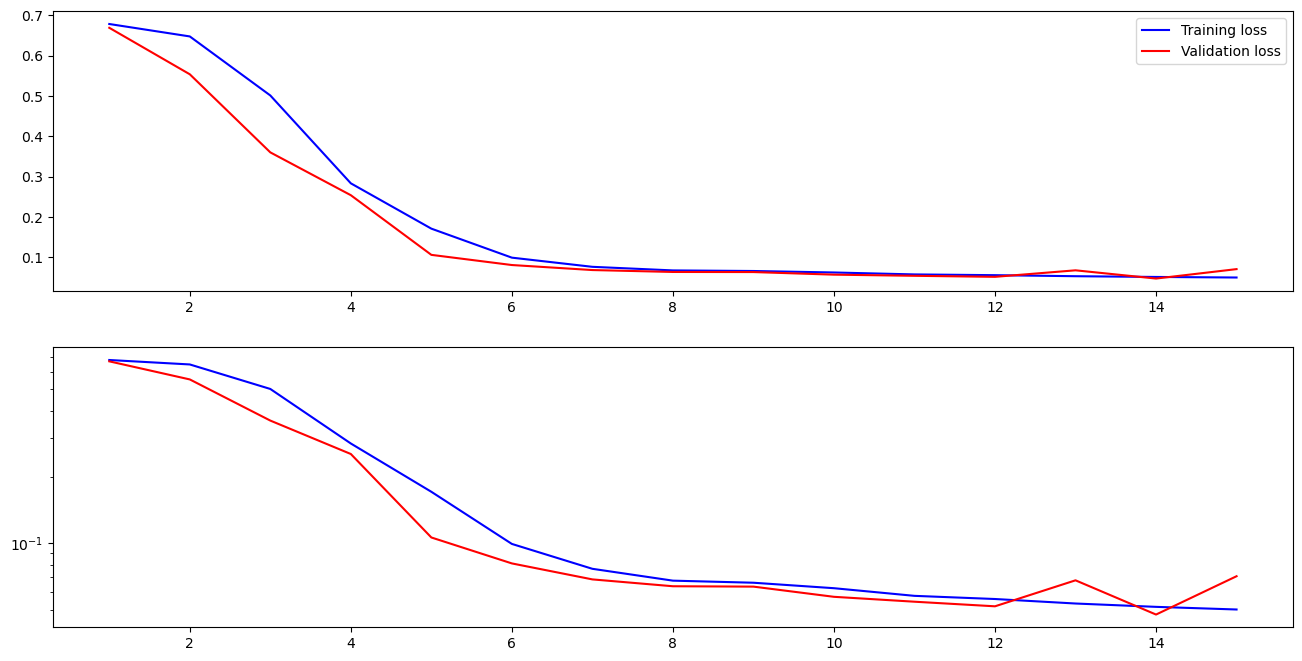

In [3]:
# Number of training epochs
epochs = 15

# Architecture variables
num_channels = 8    # Number of initial channels
num_pools = 3       # Number of pooling layers
skip_connections = 1 # Full skip connections

# Train network
report_path = train_unet(data_train, epochs, avg_radius, sigma_back, num_pools, num_channels, POOL_TYPE, POOL_STRIDE, skip_connections, nk, verbose=True)

#### 1.3. Image segmentation with trained U-Net

Now that we have trained our U-Net on the dataset, we can evaluate its performance on the test set and visualize how it segments the images. 

In [ ]:
# Read image label_path = f"../data_synthesis/generated_datasets/dataset_rad{avg_radius}_sig{sigma_back}/test/labels/001.tif" as binary image
label_path = f"../data_synthesis/generated_datasets/dataset_rad{avg_radius}_sig{sigma_back}/test/labels/001.tif"
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)


4/4 [==============================] - 4s 270ms/step
Predic_stack shape: (100, 512, 512, 2)
Labels_stack shape: (100, 512, 512, 2, 1)
Prediction shape: (100, 512, 512, 2)
Image shape: (100, 512, 512, 1)

 ---- report ---- 
Class  0  Image  0  IOU = 0.9694474935531616  TP = 154718.0
Class  1  Image  0  IOU = 0.9546105861663818  TP = 102550.0
Class  0  Image  1  IOU = 0.967814028263092  TP = 155519.0
Class  1  Image  1  IOU = 0.9514935612678528  TP = 101453.0
Class  0  Image  2  IOU = 0.9712191820144653  TP = 155836.0
Class  1  Image  2  IOU = 0.9565601944923401  TP = 101690.0
Class  0  Image  3  IOU = 0.9725562930107117  TP = 156637.0
Class  1  Image  3  IOU = 0.958107054233551  TP = 101087.0
Class  0  Image  4  IOU = 0.9690417647361755  TP = 153816.0
Class  1  Image  4  IOU = 0.9546377658843994  TP = 103414.0
Class  0  Image  5  IOU = 0.9680396318435669  TP = 154503.0
Class  1  Image  5  IOU = 0.952610969543457  TP = 102540.0
Class  0  Image  6  IOU = 0.9693260192871094  TP = 154086.0


,Image,Class,IoU,TP/Area,Accuracy,Recall,Precision
0,0.0,0.0,0.969447,154718.0,0.981400,0.988052,0.988052
1,0.0,1.0,0.954611,102550.0,0.981400,0.971531,0.971531
2,1.0,0.0,0.967814,155519.0,0.980270,0.979209,0.979209
3,1.0,1.0,0.951494,101453.0,0.980270,0.981901,0.981901
4,2.0,0.0,0.971219,155836.0,0.982384,0.981786,0.981786
...,...,...,...,...,...,...,...
195,97.0,1.0,0.959180,100900.0,0.983620,0.972708,0.972708
196,98.0,0.0,0.970951,156291.0,0.982162,0.984095,0.984095
197,98.0,1.0,0.955826,101177.0,0.982162,0.979192,0.979192
198,99.0,0.0,0.971096,156899.0,0.982185,0.987202,0.987202


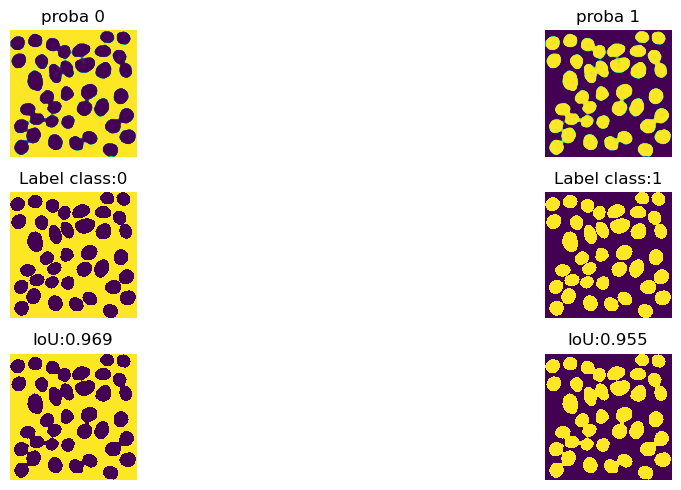

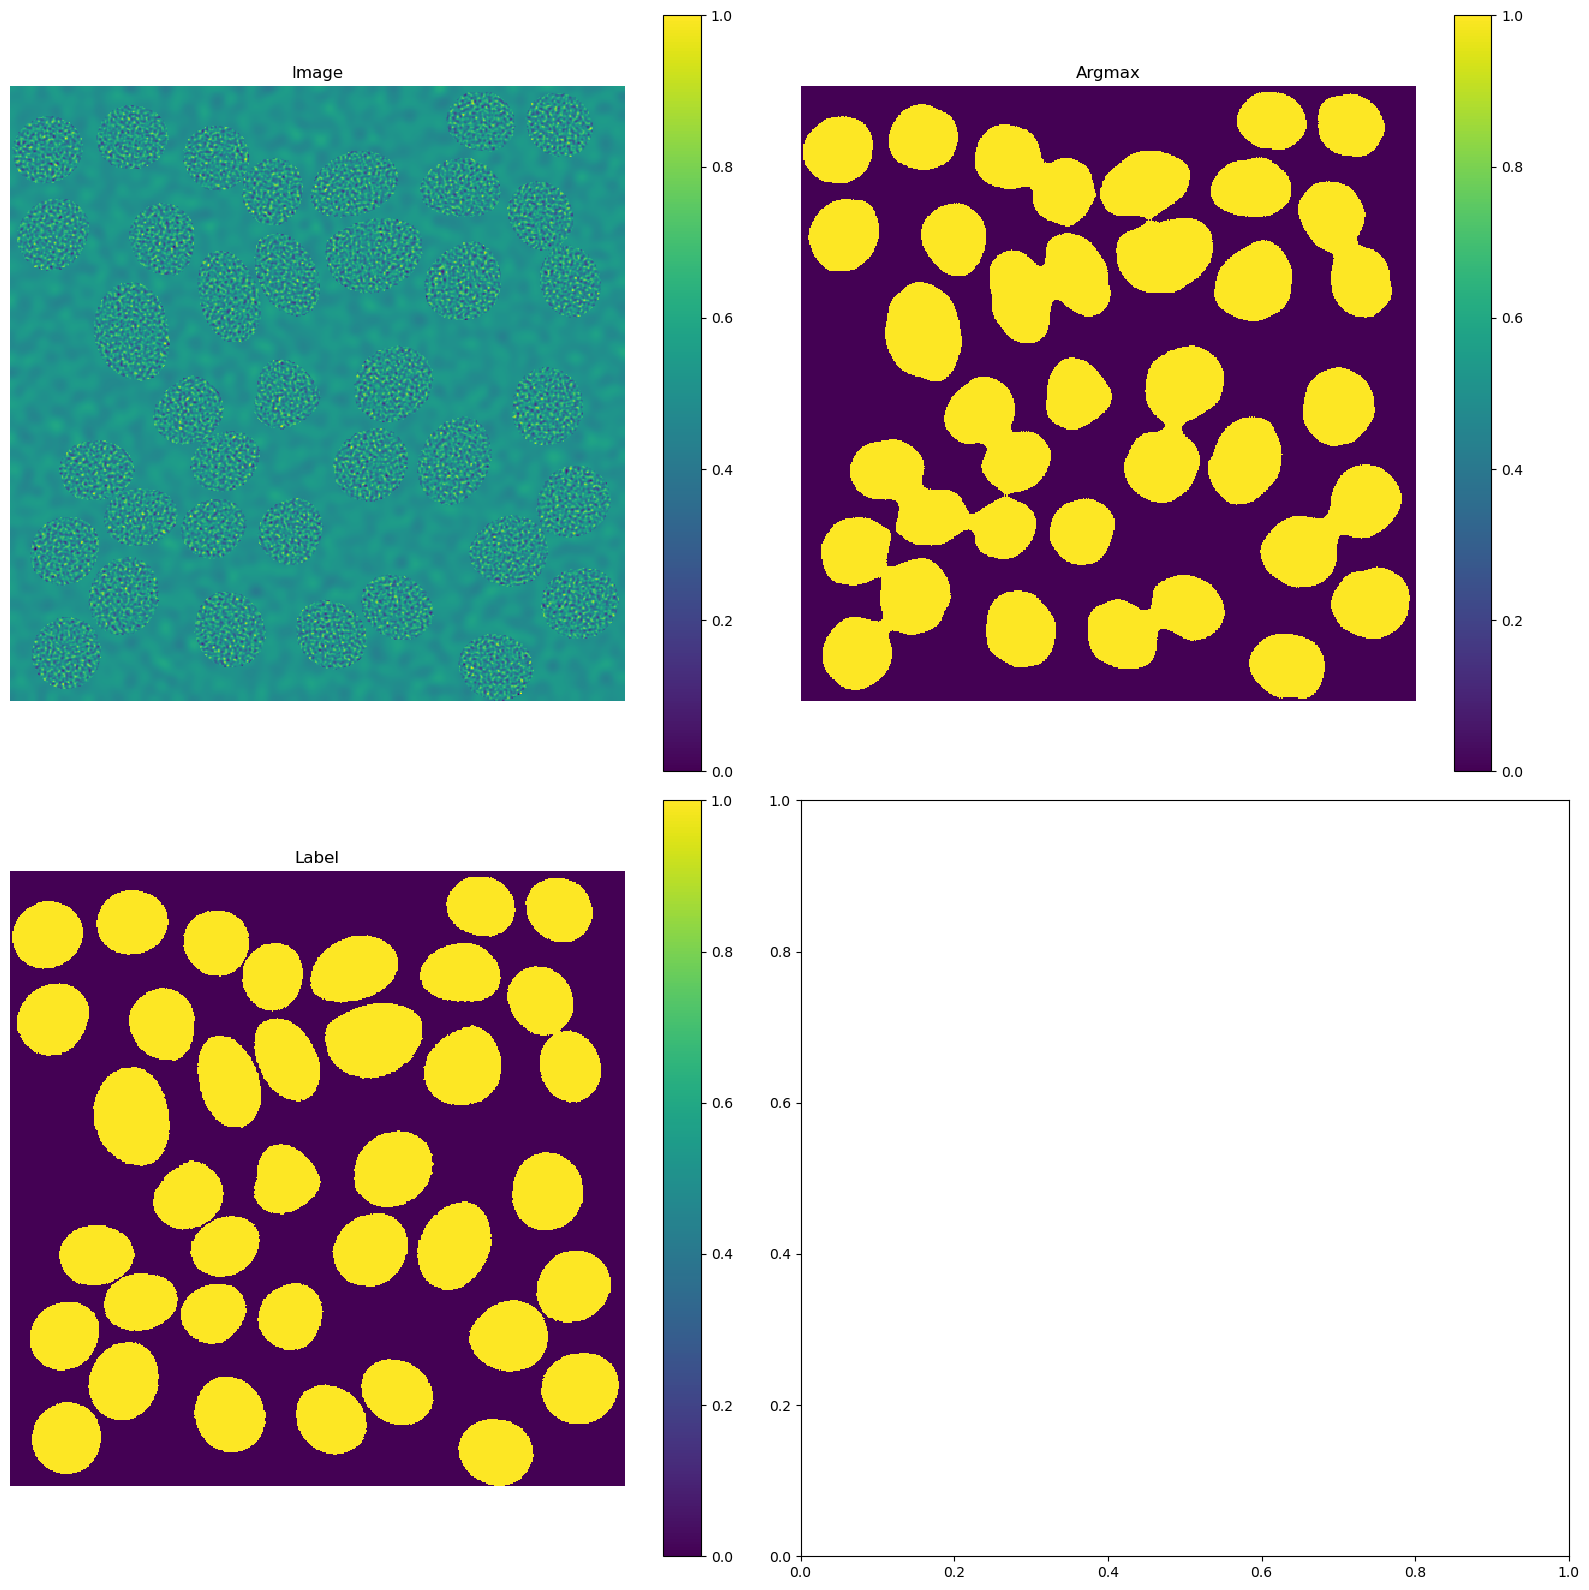

IoU/classes  [0.96984057 0.95462999]
IoU/mean  0.9622352820634842


In [4]:
report_path = f"../results/rad{avg_radius}_sig{sigma_back}_ch{num_channels}_pools{num_pools}_{POOL_TYPE}_stride{POOL_STRIDE}_skip1-1-1_{epochs}E"
prediction = test_unet(data_test, report_path, verbose=True, display_plots=1)

## 2. Experiment A: Architecture and dataset parameters

**Goal**: Analyze the effect of data parameters (average cell radius and texture similarity) and U-Net parameters (number of initial channels and number of pooling layers) on the performance of the image segmentation model. 

**Architecture parameters**: These are the main architecture parameters: they quantify the number of parameters (capacity) in the U-net. 

- *Number of pooling layers*: A pooling layer is used to downsample the spatial resolution of the input data. This is typically done by applying a pooling function, such as maximum pooling or average pooling, to the input data within a local region. The use of pooling layers can help to reduce the computational complexity of the network and improve its ability to learn high-level features from the input data.

- *Number of initial channels*: a channel refers to a dimension of the input data that corresponds to a specific feature or attribute. The number of initial channels is the number of channels at the first layer, then for every layer in the contractive path we downsample by 2 (divide resolution of image by 2) but double the number of channels. 

**Dataset parameters**: These are the only two parameters which we vary in our data generation process. 

- *Average radius of cells*
- *Similarity*: ratio of the standard deviation of the background to that of the cells. The higher the similarity, the less noticeable is the difference between cell and background in the input images. Intuition: Higher similarity --> More local minima, harder to optimize, decreased IoU.


**Hypothesis**: Our intuition is that
- Larger objects will require a larger receptive field to be appropriately segmented (and not split into several sub-objects), and so a higher number of pooling layers will favor the IoU. 
- Higher similarity will lead to more local minima in the optimization landscape, harder to optimize, decreased final IoU. 

**Method**: We will test these intuitions by training a U-net on two separate series of dataset (one which varies the size of cells and the other which varies the texture similarity) with various combinations of `n_pools` and `n_channels`. We compute its performance as its weighted IoU. 

### 2.1. Running experiment A

Now that we can train a U-Net, we run our experiment by training multiple U-Nets for different architectures over different datasets and storing their respective IoU (weighted by the proportion of cell and background pixels). 

In [5]:
avg_radius_vals = [20, 30, 40, 50]
similarity_vals = [1/2.5, 1/5.0, 1/7.5, 1/10]
num_channels_vals = [2, 4, 8, 16, 32]
num_pools_vals = [1, 2, 3, 4, 5]

IoU_gridA = experimentA(
    avg_radius_vals, similarity_vals, num_channels_vals, num_pools_vals, 
    epochs=150, skip_connections=1, verbose=False)

In [6]:
# Picking example: radisu 20, similarity 1/10, channels 2, pools 2: 
IoU_gridA[0, 3, 0, 1]

0.9613414987325668

### 2.2. Visualizing results

For each combination of data parameters (`avg_radius`, `similarity`), we plot a heatmap with test IoU for each combination of architecture parameters (`n_pools`, `n_channels`).


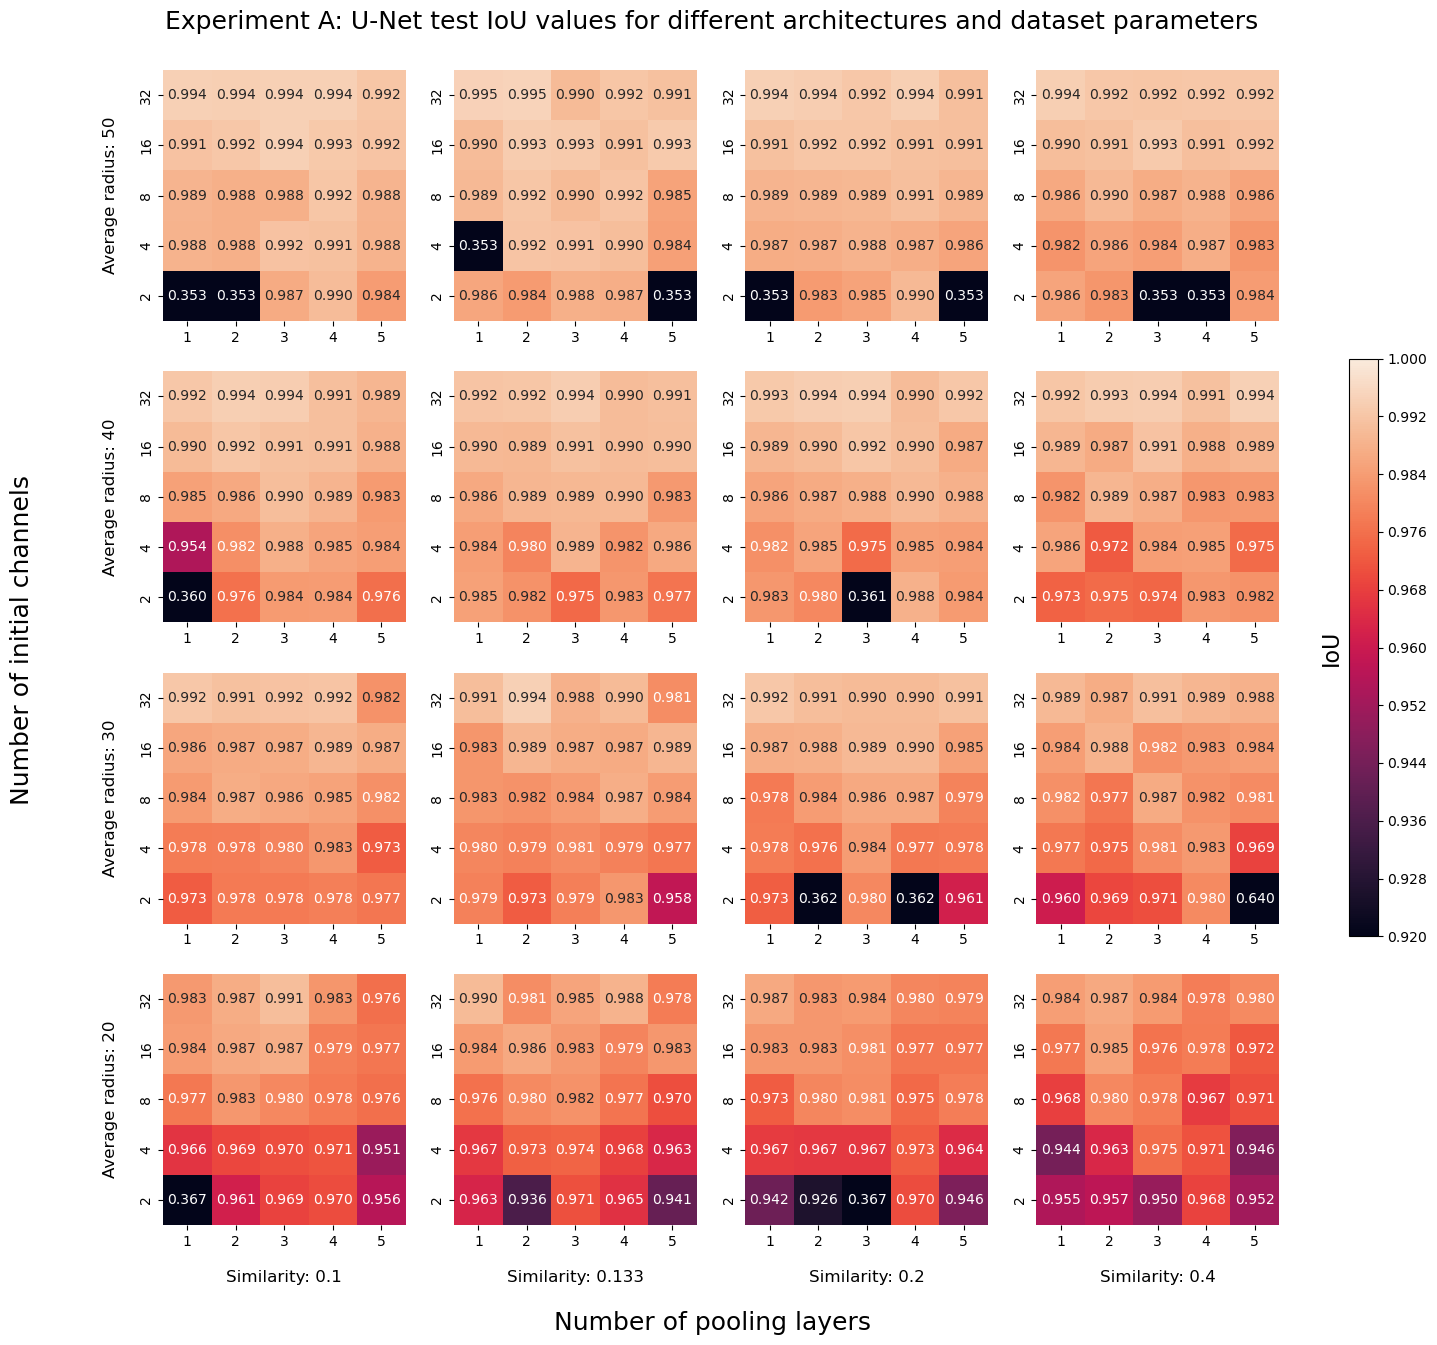

In [7]:
plot_experimentA(IoU_gridA, avg_radius_vals, similarity_vals, num_pools_vals, num_channels_vals, save=True)

Inversely, for each combination of architecture parameters (`n_pools`, `n_channels`), we plot a heatmap with test IoU for each combination of dataset parameters (`avg_radius`, `similarity`).

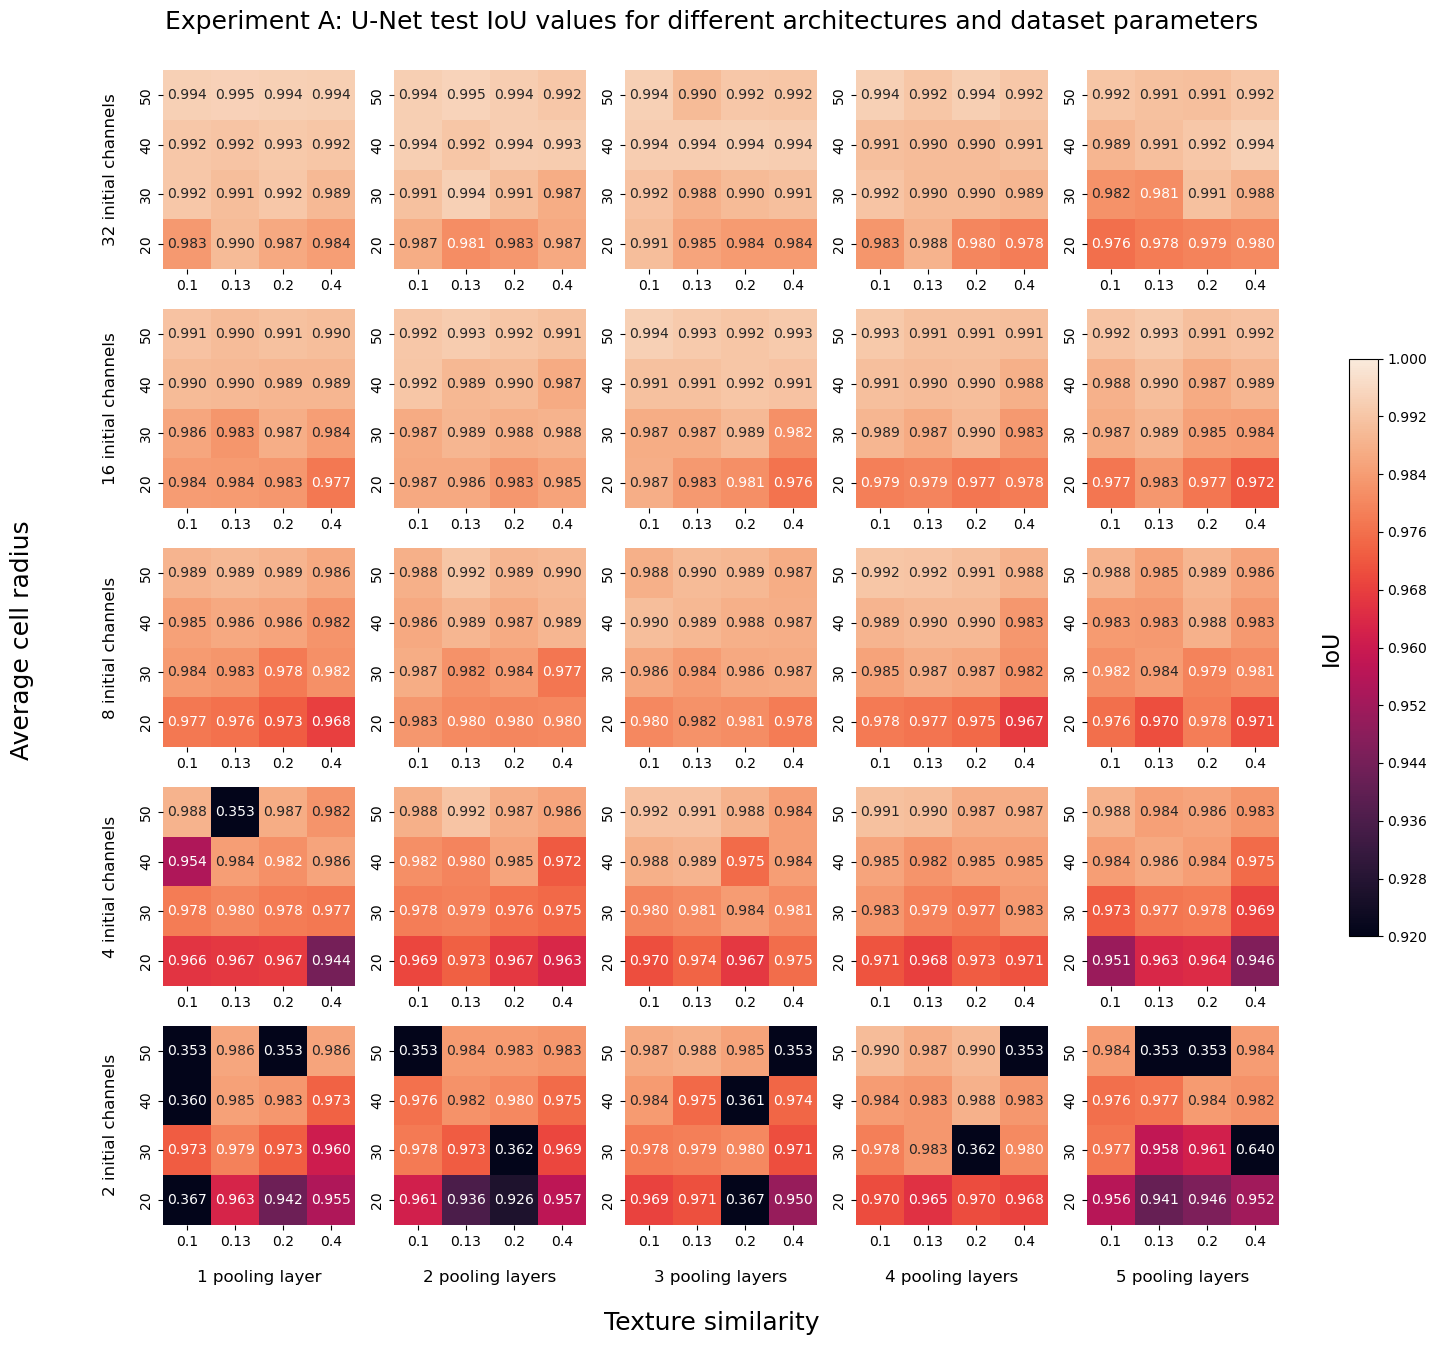

In [8]:
plot_experimentA_inverted(IoU_gridA, avg_radius_vals, similarity_vals, num_pools_vals, num_channels_vals, save=True)

## 3. Experiment B: Receptive field

**Goal**: Determine a relationship between the number of pooling steps, the receptive field size and the distribution of object sizes. 

### 3.1. Receptive field size

The receptive field is the region of the input image that is used by a convolutional neural network to produce the output for a specific location in the output feature map. It is the region of the input that a particular filter in the network "sees" when producing its output. The size of the receptive field determines how much of the input image is used to produce the output for a specific location, and therefore has an impact on the ability of the network to capture spatial context and long-range dependencies in the input.



In [9]:
def receptive_field(num_pools, kernel_size=3, pool_stride=2):
    rf = 1
    for _ in range(num_pools):
        rf = (rf + kernel_size -1) * pool_stride
    for _ in range(num_pools):
        rf = rf * pool_stride + kernel_size -1

    return rf

### 3.2. Relationships

**Method**

    For each `avg_radius`: 
        For each `num_pools`
            1. Compute receptive field of U-Net with `num_pools` pooling layers. 
            2. Train a U-Net with `num_pools` pooling layers on the dataset with `avg_radius` and compute test IoU.

We can then visualize the relationship between the performance of the U-Net for various number of pooling layers and average cell radius. 

In [10]:
# Run experiment B
num_pools_vals = [1, 2, 3, 4, 5]
avg_radius_vals = [20, 30, 40, 50]

IoU_gridB = experimentB(avg_radius_vals, num_pools_vals, num_channels=16, similarity=0.2, skip_connections=1, epochs=150, verbose=False)


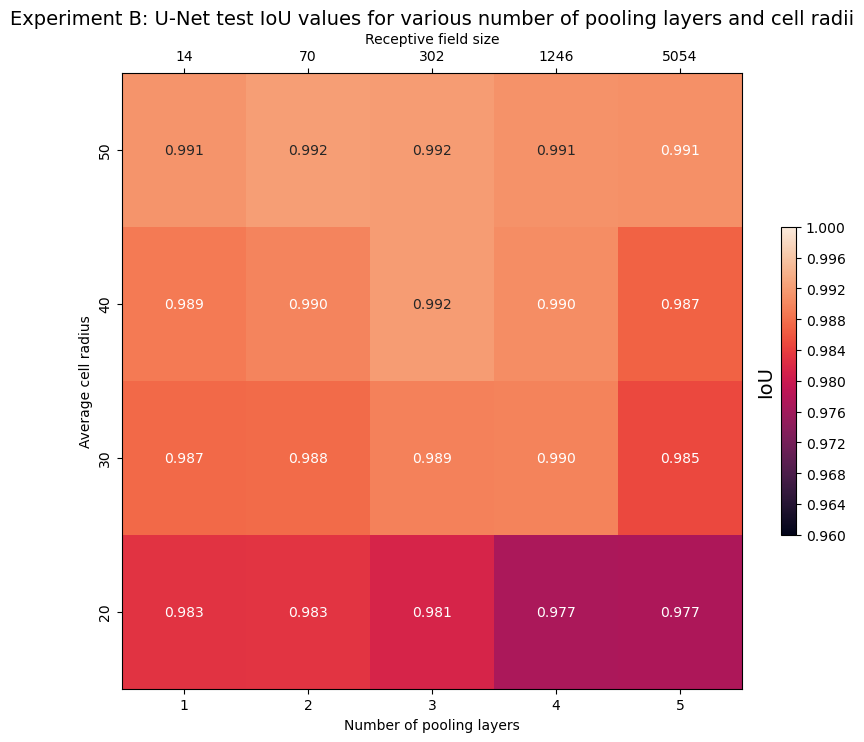

In [11]:
plot_experimentB(IoU_gridB, num_pools_vals, avg_radius_vals, save=True)

### Experiment C: Skip connections

**Goal**: Determine the effect of skip connections on the performance of a U-net for varying scales of cells and number pooling layers. 

**Method**: 
    
    For each avg_radius: 
        For each num_pools: 
            2. For each combination of skip_connections (e.g. 00, 01, 10, 11 for num_pools = 2):
                a. Train a U-Net with given skip connections and num_pools on a fixed training set. 
                b. Predict on test set and compute the weighted IoU. 


In [12]:
num_pools_vals = [1, 2, 3, 4]
avg_radius_vals = [20, 30, 40, 50]

IoU_gridC = experimentC(num_pools_vals, avg_radius_vals, num_channels=16, similarity = 0.2, epochs=50, verbose=False)


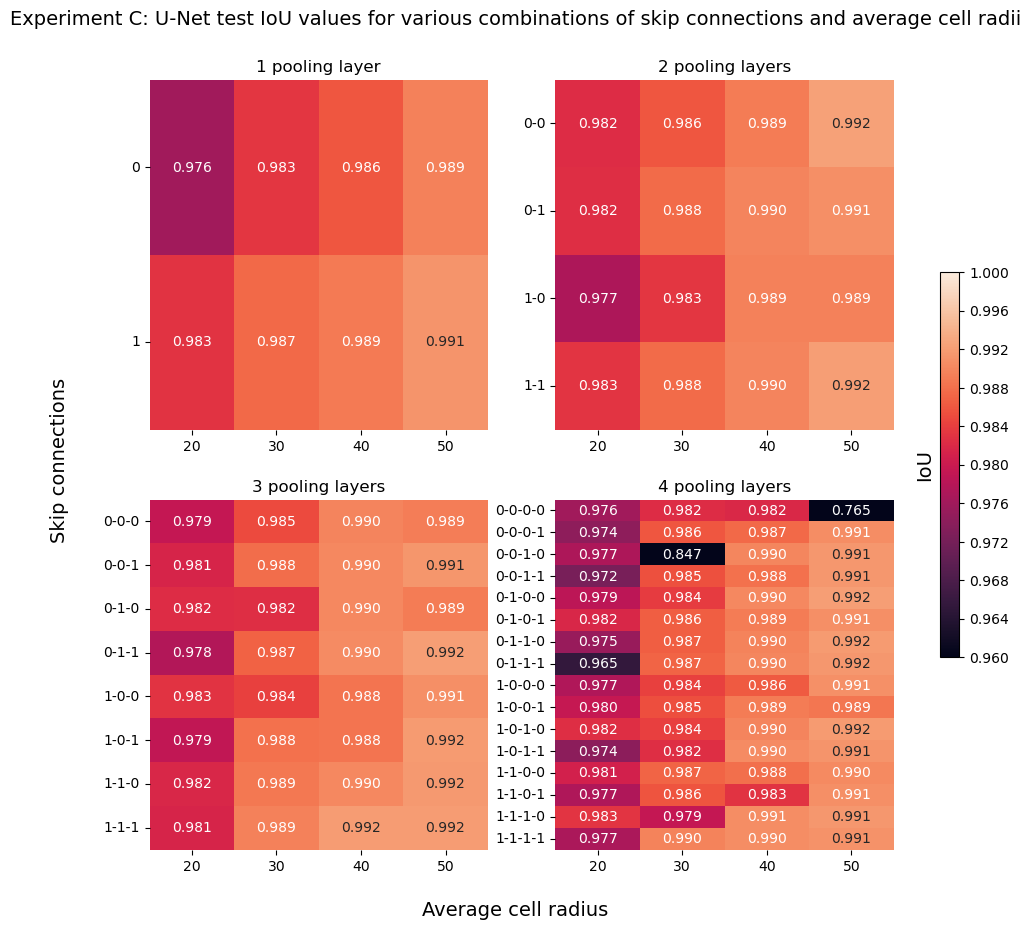

In [13]:
plot_experimentC(IoU_gridC, num_pools_vals, avg_radius_vals, save=True)